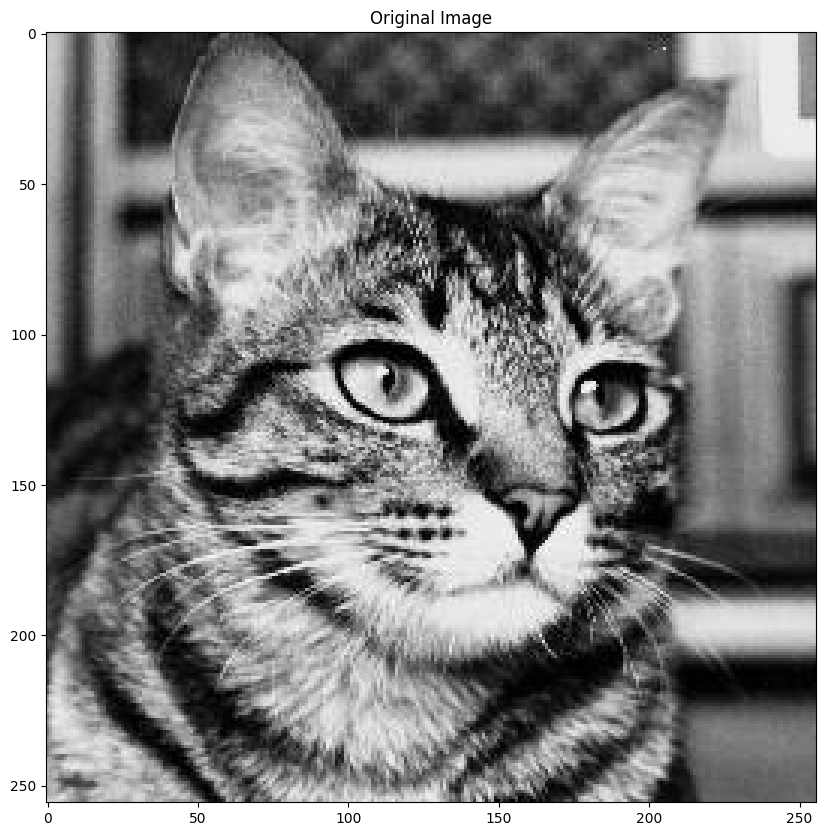

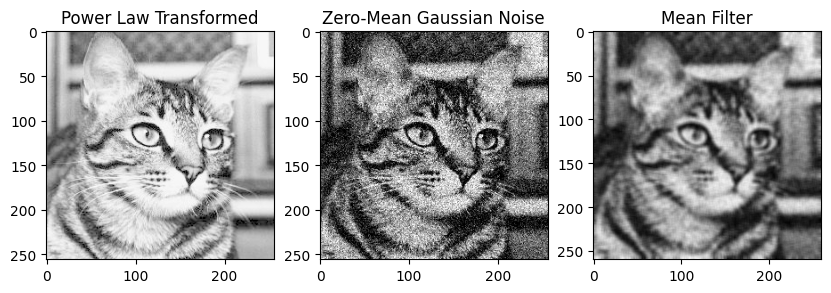

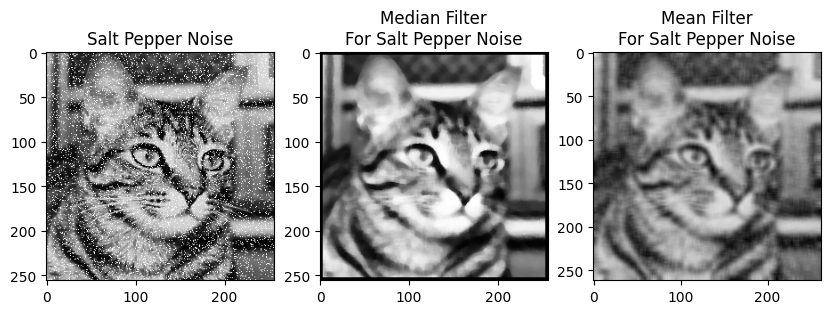

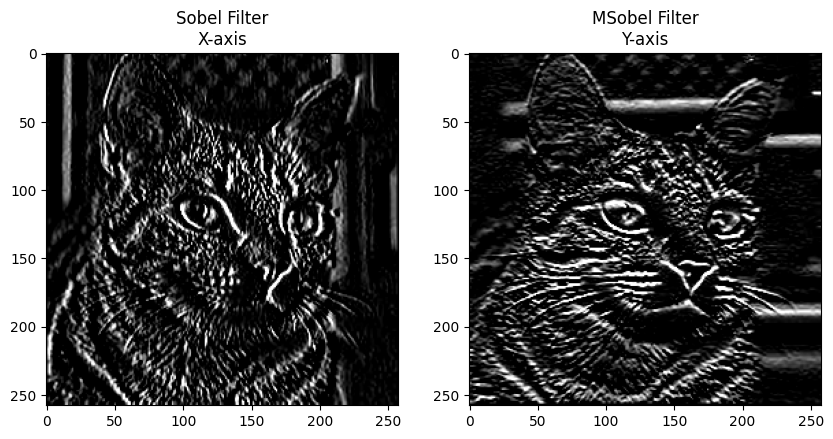

In [ ]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread("Q_4.jpg", cv2.IMREAD_GRAYSCALE)
# output_folder = "output/"

thresholds = [50, 100, 150, 200, 250]

for threshold in thresholds:
    canny = cv2.Canny(image, threshold, threshold * 2)
    # cv2.imwrite(output_folder + f"Q_4_canny_{threshold}.jpg", canny)
    plt.imshow(canny, cmap='gray')
    plt.title(f'Q_4_canny_{threshold}')
    plt.show()


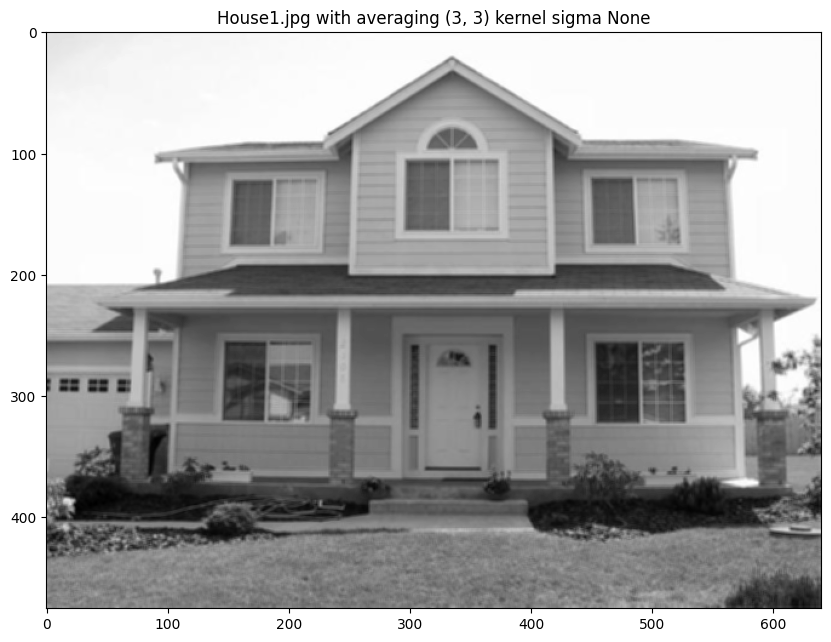

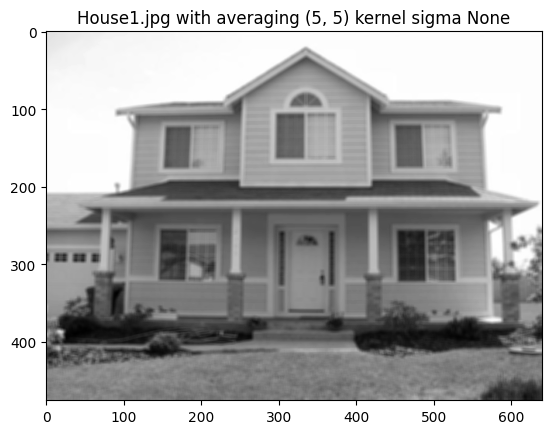

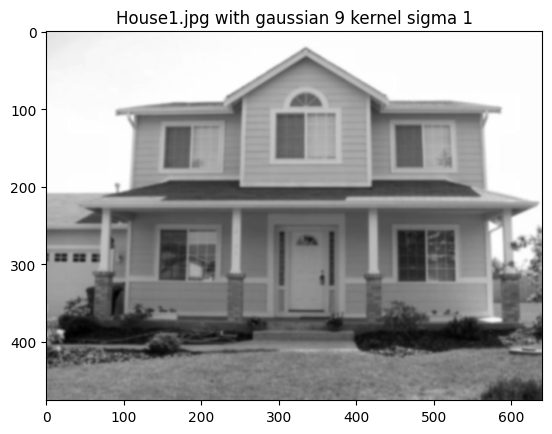

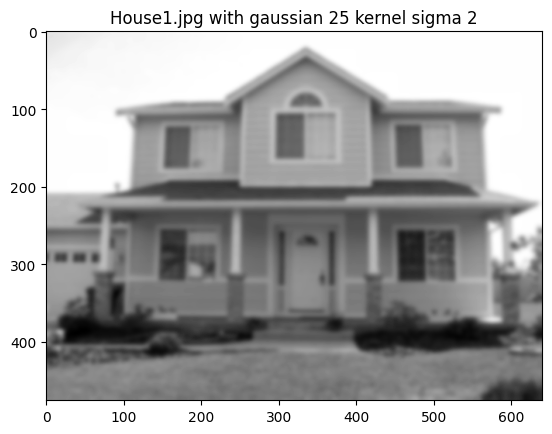

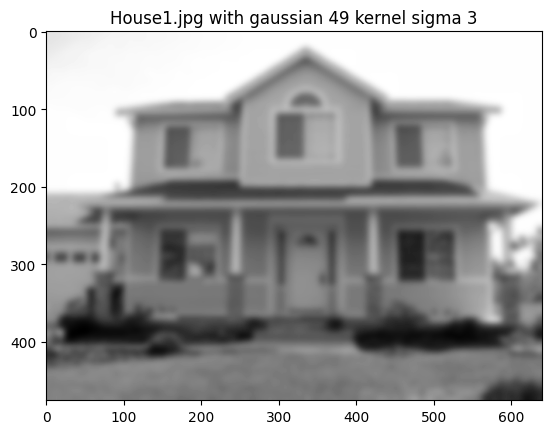

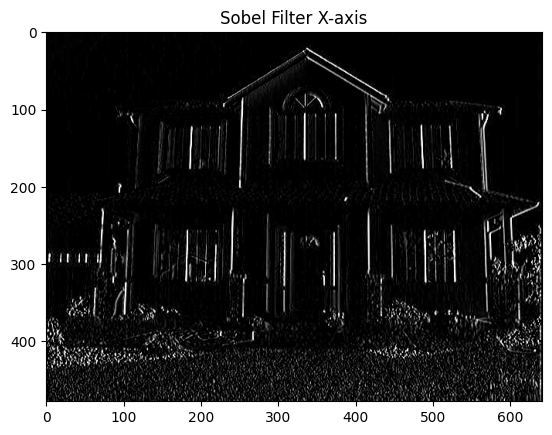

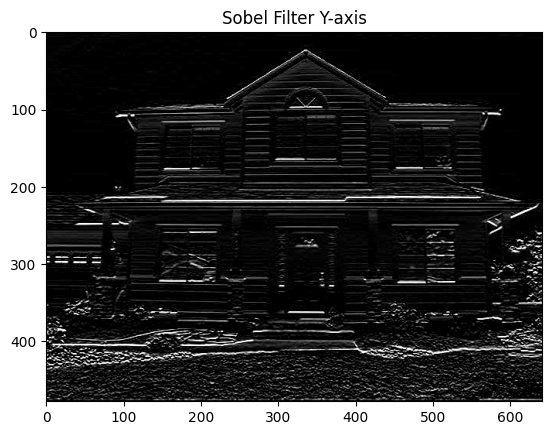

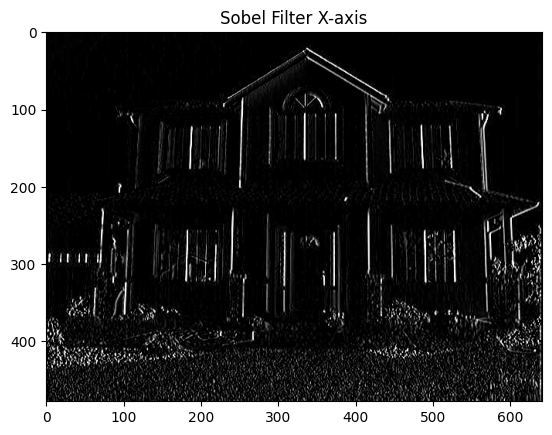

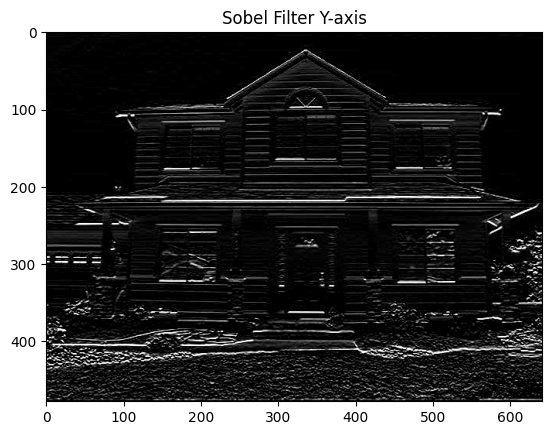

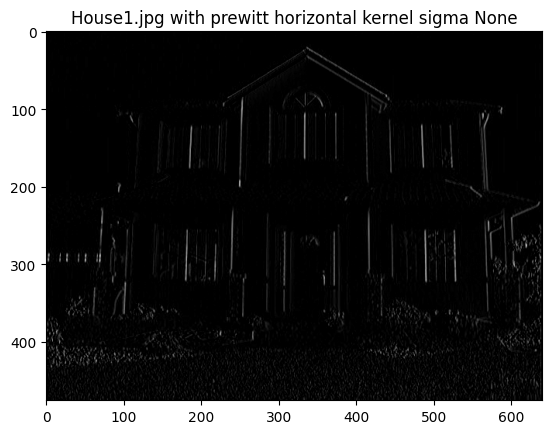

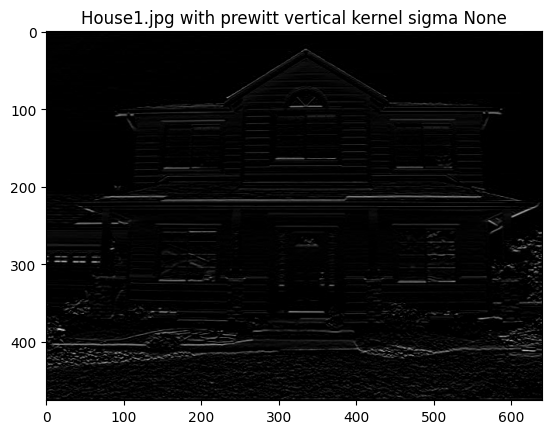

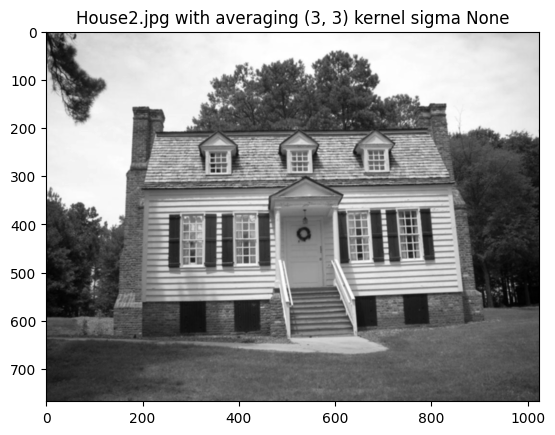

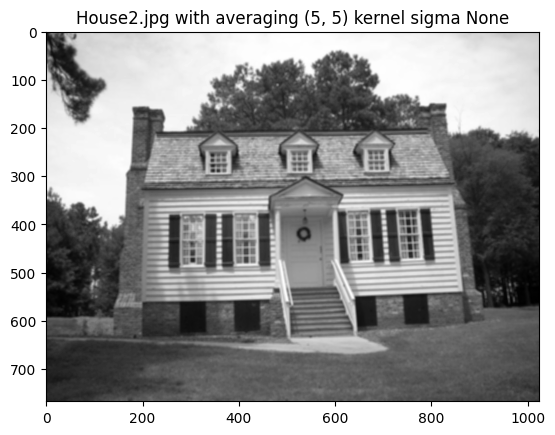

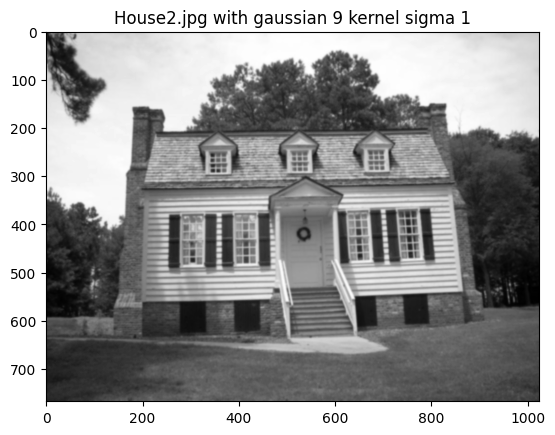

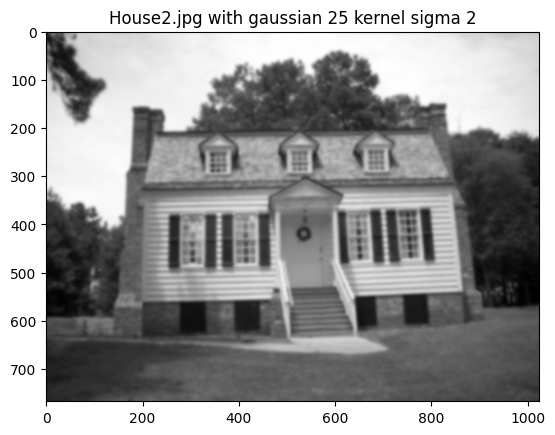

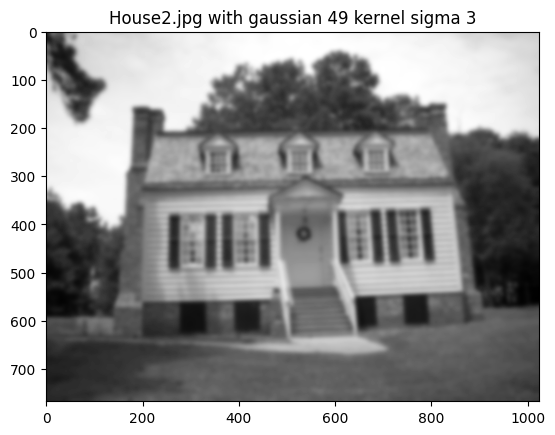

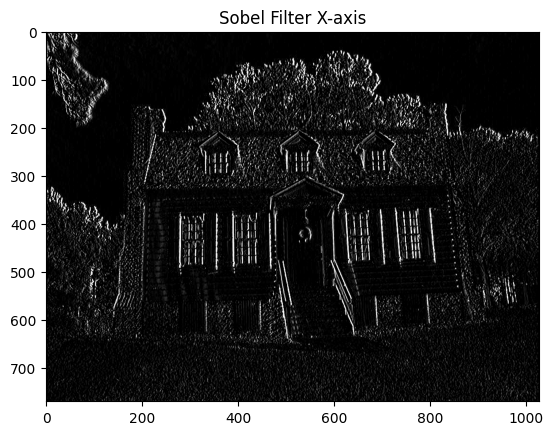

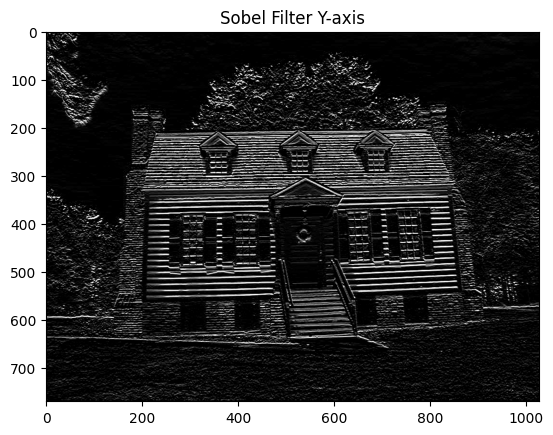

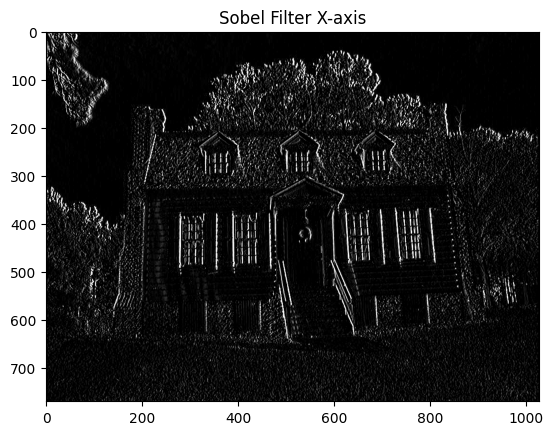

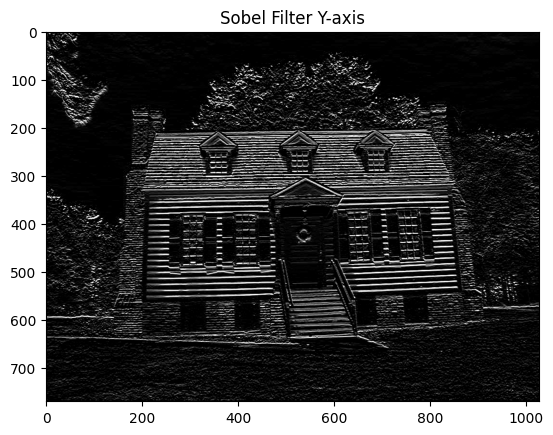

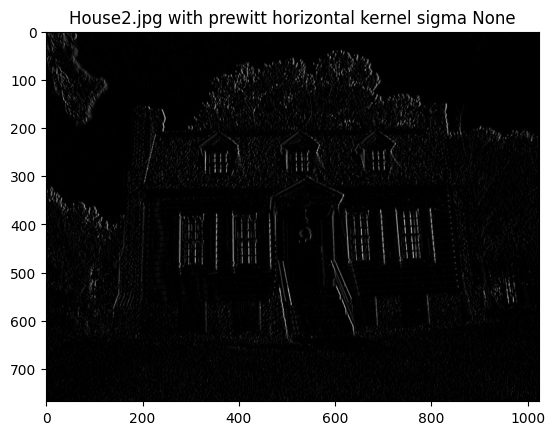

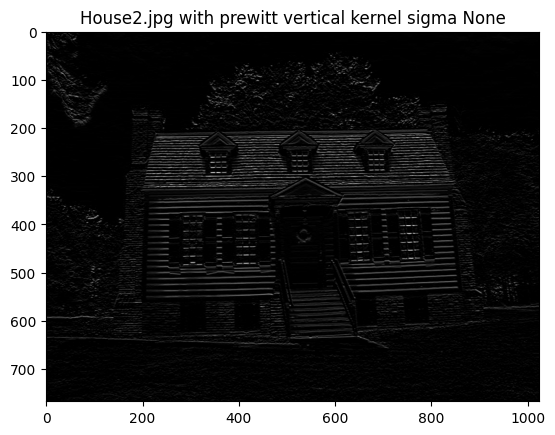

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def generate_gaussian_kernel(sigma, size):
    center = size // 2
    x = np.linspace(-center, center, size)
    y = x[:, np.newaxis]
    xy_squared_norm = np.square(x) + np.square(y)
    sigma_squared = 2 * sigma * sigma
    exponent = xy_squared_norm / (-2 * sigma_squared)
    gaussian_kernel = np.exp(exponent)
    gaussian_kernel /= np.sum(gaussian_kernel)
    return gaussian_kernel


def mean_filter(img, kernel, border_type=cv2.BORDER_REPLICATE):
    padded_image = cv2.copyMakeBorder(img, kernel.shape[0] // 2, kernel.shape[0] // 2, kernel.shape[1] // 2,
                                      kernel.shape[1] // 2, border_type)
    filtered_img = cv2.filter2D(padded_image, -1, kernel)
    return filtered_img


def sobel_filter(img):
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    x_output = mean_filter(img, kernel_x)
    y_output = mean_filter(img, kernel_y)

    return x_output, y_output


def prewitt_filter(img, sigma):
    horizontal_kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]) / 6
    vertical_kernel = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]) / 3

    return horizontal_kernel, vertical_kernel


def my_filter(img, func, kernel_size, sigma):
    if func == cv2.GaussianBlur:
        kernel = generate_gaussian_kernel(sigma, kernel_size)
    elif func == prewitt_filter:
        prewitt_kernels = prewitt_filter(img, kernel_size)
        if kernel_size == "horizontal":
            kernel = prewitt_kernels[0]
        elif kernel_size == "vertical":
            kernel = prewitt_kernels[1]
        else:
            raise ValueError(f"Invalid Prewitt filter type: {kernel_size}")
    elif func == cv2.Sobel:
        kernel_x, kernel_y = sobel_filter(img)
        return kernel_x, kernel_y
    else:
        kernel = np.ones(kernel_size) / (kernel_size[0] * kernel_size[1])
    output_image = cv2.filter2D(img, -1, kernel)
    return output_image


def test_filter():
    images = ["House1.jpg", "House2.jpg"]
    # output_folder = "output/"
    kernels = {
        "averaging": [
            (cv2.blur, (3, 3), None),
            (cv2.blur, (5, 5), None),
        ],
        "gaussian": [
            (cv2.GaussianBlur, 9, 1),
            (cv2.GaussianBlur, 25, 2),
            (cv2.GaussianBlur, 49, 3),
        ],
        "sobel": [
            (cv2.Sobel, (5, 5), 1),
            (cv2.Sobel, (5, 5), 0),
        ],
        "prewitt": [
            (prewitt_filter, "horizontal", None),
            (prewitt_filter, "vertical", None),
        ],
    }
    plt.figure(figsize=(10, 10))

    for image in images:
        img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
        # cv2.imwrite(output_folder + f"original_{image}_image.jpg", img)
        for kernel_name, kernel_info in kernels.items():
            for func, kernel_size, sigma in kernel_info:
                if func == cv2.Sobel:
                    output_image_x, output_image_y = my_filter(img.copy(), func, kernel_size, sigma)
                    # cv2.imwrite(output_folder + f'{image} Sobel Filter X-axis.jpg',
                    #             output_image_x)
                    # cv2.imwrite(output_folder + f'{image} Sobel Filter Y-axis.jpg',
                    #             output_image_y)
                    plt.imshow(output_image_x, cmap='gray')
                    plt.title('Sobel Filter X-axis')
                    plt.show()
                    plt.imshow(output_image_y, cmap='gray')
                    plt.title('Sobel Filter Y-axis')
                    plt.show()
                else:
                    output_image = my_filter(img.copy(), func, kernel_size, sigma)
                    # cv2.imwrite(output_folder + f'{image} with {kernel_name} {kernel_size} kernel sigma {sigma}.jpg',
                    #             output_image)
                    plt.imshow(output_image, cmap='gray')
                    plt.title(f'{image} with {kernel_name} {kernel_size} kernel sigma {sigma}')
                    plt.show()


test_filter()


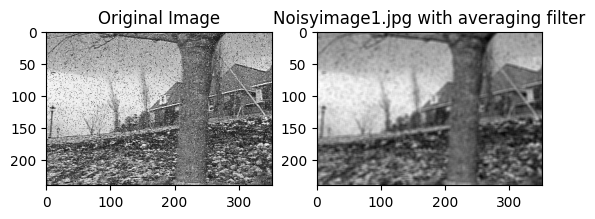

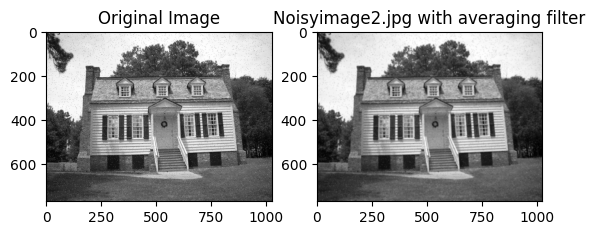

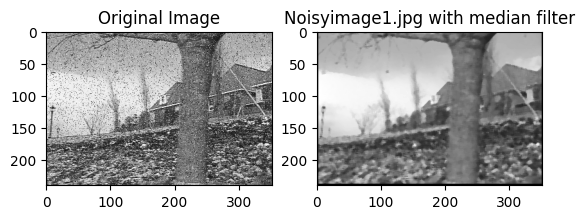

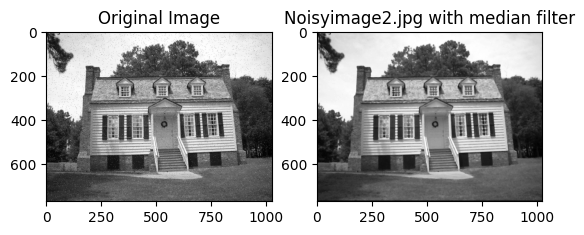

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def averaging_filter(image):
    kernel = np.ones((5, 5)) / 25
    return cv2.filter2D(image, -1, kernel)


def median_filter(image):
    rows, cols = image.shape
    filter_size = 5
    offset = filter_size // 2
    filtered_image = np.zeros_like(image)

    for i in range(offset, rows - offset):
        for j in range(offset, cols - offset):
            local_window = image[i - offset:i + offset + 1, j - offset:j + offset + 1]
            sorted_window = np.sort(local_window.flatten())
            median = sorted_window[len(sorted_window) // 2]
            filtered_image[i, j] = median

    return filtered_image


def filters():
    images = ["Noisyimage1.jpg", "Noisyimage2.jpg"]
    # output_folder = "output/"

    for image in images:
        img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
        # cv2.imwrite(output_folder + f"original {image} image.jpg", img)
        plt.subplot(121)
        plt.imshow(img, cmap='gray')
        plt.title("Original Image")
        filtered_image = averaging_filter(img)
        # cv2.imwrite(output_folder + f"{image} with averaging filter.jpg", filtered_image)
        # filtered_m_image = median_filter(img.copy())
        # cv2.imwrite(output_folder + f"{image} with median filter.jpg", filtered_m_image)
        plt.subplot(122)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(f"{image} with averaging filter")
        plt.show()

    for image in images:
        img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
        # cv2.imwrite(output_folder + f"original {image} image.jpg", img)
        plt.subplot(121)
        plt.imshow(img, cmap='gray')
        plt.title("Original Image")
        filtered_image = median_filter(img.copy())
        plt.subplot(122)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(f"{image} with median filter")
        plt.show()


filters()


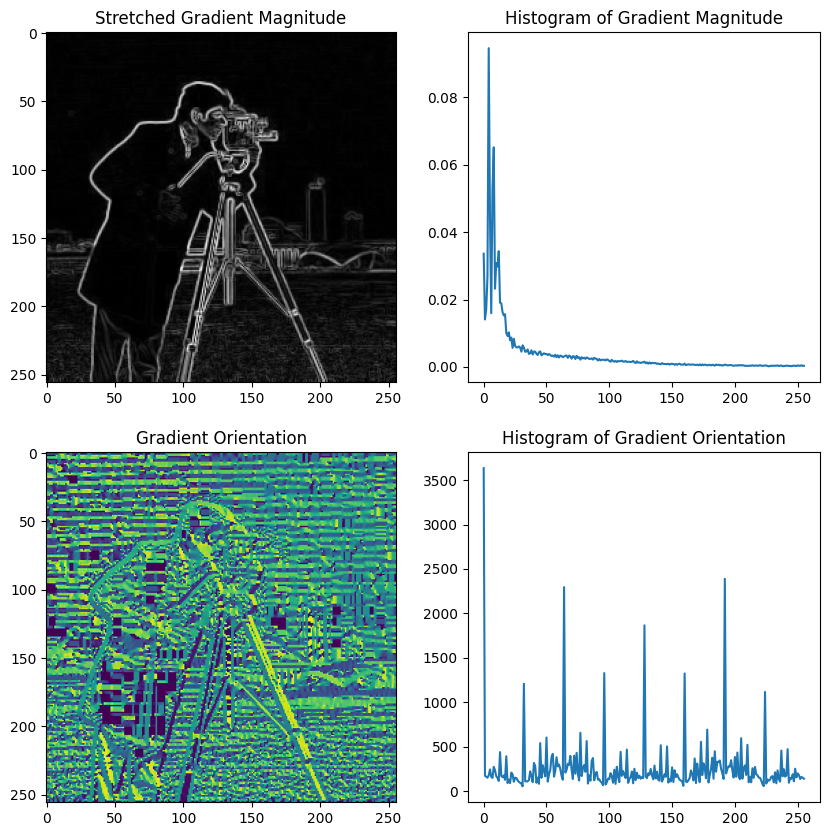

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


img = cv2.imread('Q_4.jpg', cv2.IMREAD_GRAYSCALE)
# output_folder = "output/"

sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

magnitude = np.power(sobel_x ** 2 + sobel_y ** 2, 0.5)
hist_mag, bins = np.histogram(magnitude, bins=256, range=(0, 255), density=True)

magnitude = (magnitude / np.max(magnitude)) * 255
stretched_gradient_magnitude = cv2.convertScaleAbs(magnitude)

gradient_orientation = cv2.phase(sobel_x, sobel_y)
mag, angle = cv2.cartToPolar(sobel_x, sobel_y, angleInDegrees=True)

angle_hist, _ = np.histogram(angle.flatten(), bins=256)

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(stretched_gradient_magnitude, cmap='gray')
plt.title('Stretched Gradient Magnitude')

plt.subplot(222)
plt.plot(hist_mag)
plt.title('Histogram of Gradient Magnitude')

plt.subplot(223)
plt.imshow(gradient_orientation, cmap='viridis')
plt.title('Gradient Orientation')

plt.subplot(224)
plt.plot(angle_hist)
plt.title('Histogram of Gradient Orientation')

plt.show()

# plt.savefig(output_folder + "Q4.jpg")


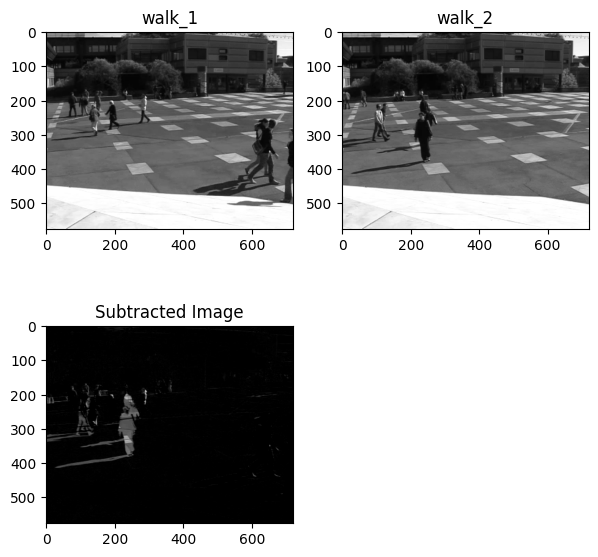

In [2]:
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread("walk_1.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("walk_2.jpg", cv2.IMREAD_GRAYSCALE)
# output_folder = "output/"

subtracted_image = cv2.subtract(img1, img2)

# cv2.imwrite(output_folder + "walk_1.jpg", img1)
# cv2.imwrite(output_folder + "walk_2.jpg", img2)
# cv2.imwrite(output_folder + "Subtracted Image.jpg", subtracted_image)

plt.figure(figsize=(7, 7))

plt.subplot(221)
plt.imshow(img1, cmap='gray')
plt.title('walk_1')

plt.subplot(222)
plt.imshow(img2, cmap='gray')
plt.title('walk_2')

plt.subplot(223)
plt.imshow(subtracted_image, cmap='gray')
plt.title('Subtracted Image')


plt.show()



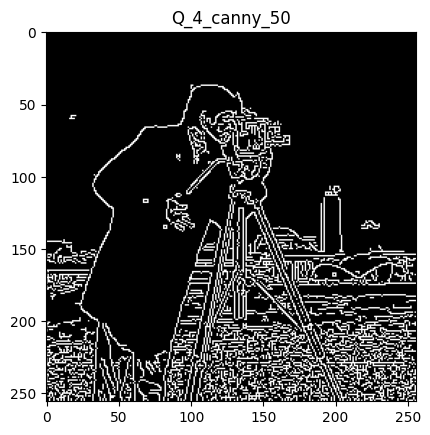

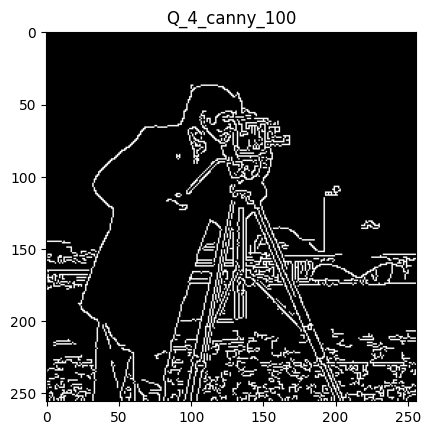

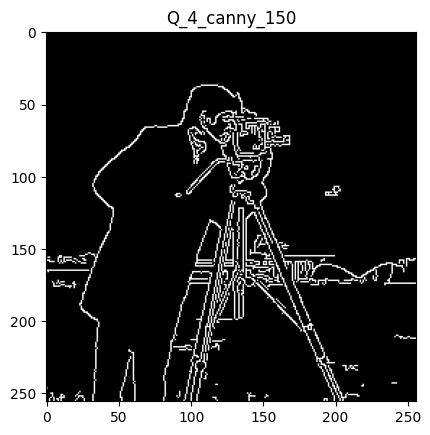

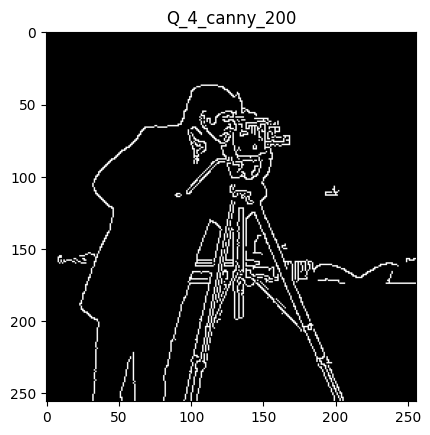

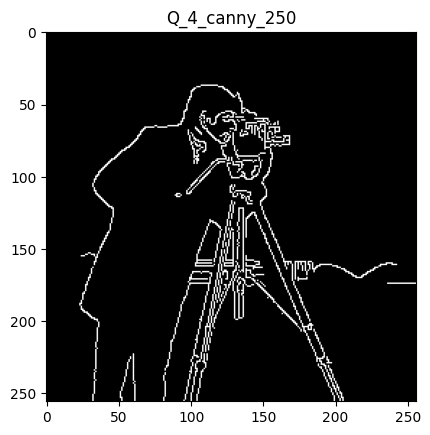

In [ ]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread("Q_4.jpg", cv2.IMREAD_GRAYSCALE)
# output_folder = "output/"

thresholds = [50, 100, 150, 200, 250]

for threshold in thresholds:
    canny = cv2.Canny(image, threshold, threshold * 2)
    # cv2.imwrite(output_folder + f"Q_4_canny_{threshold}.jpg", canny)
    plt.imshow(canny, cmap='gray')
    plt.title(f'Q_4_canny_{threshold}')
    plt.show()
